In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("commodity_trade_statistics_data.csv")

df.head()

C:\Users\ken88\AppData\Local\Temp\ipykernel_82172\2468870482.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("commodity_trade_statistics_data.csv")


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [24]:
df_export = df[df['flow'] == 'Export']
df_export = df_export[df_export['trade_usd']>0]
df_export = df_export[df_export['commodity'] != 'ALL COMMODITIES']
df_export.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852516 entries, 0 to 8216685
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 239.4+ MB


<Axes: title={'center': '全球前10大出口商品（依金額）'}, ylabel='commodity'>

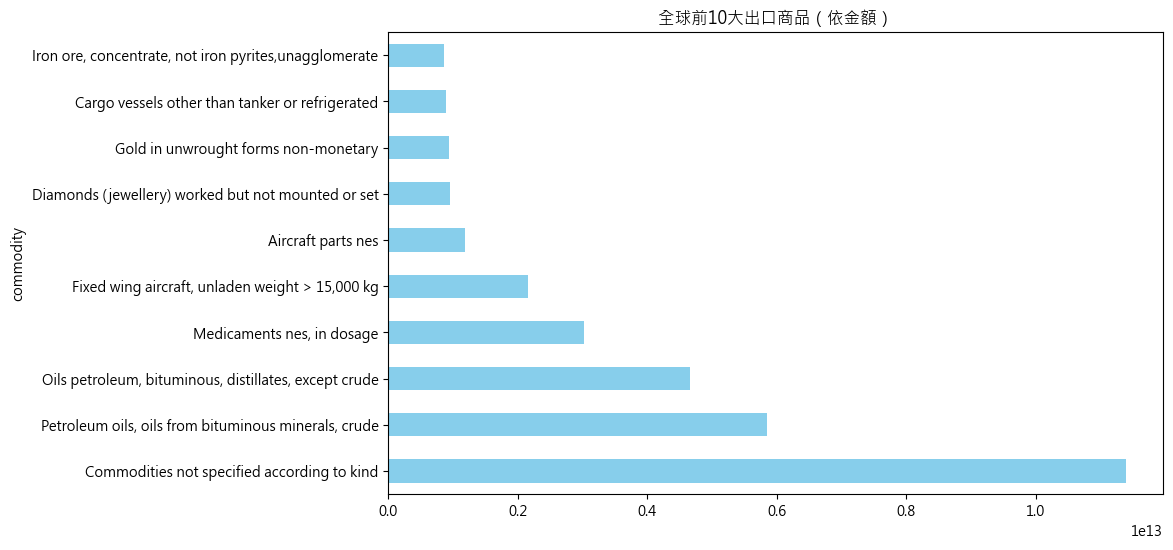

In [25]:
top_commodities = (
    df_export.groupby('commodity')['trade_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_commodities.plot(kind='barh', figsize=(10, 6), title='全球前10大出口商品（依金額）', color='skyblue')


<Axes: title={'center': '全球前10大出口國家'}, xlabel='country_or_area'>

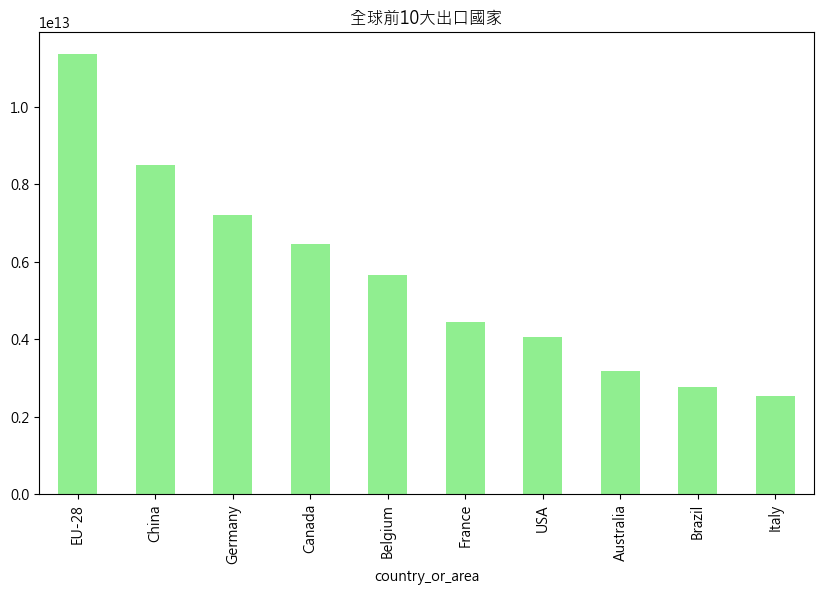

In [26]:
top_countries = (
    df_export.groupby('country_or_area')['trade_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind = 'bar', figsize=(10,6), title = '全球前10大出口國家',color = 'lightgreen')

<Axes: title={'center': 'Commodities not specified according to kind 出口前10大國'}, ylabel='country_or_area'>

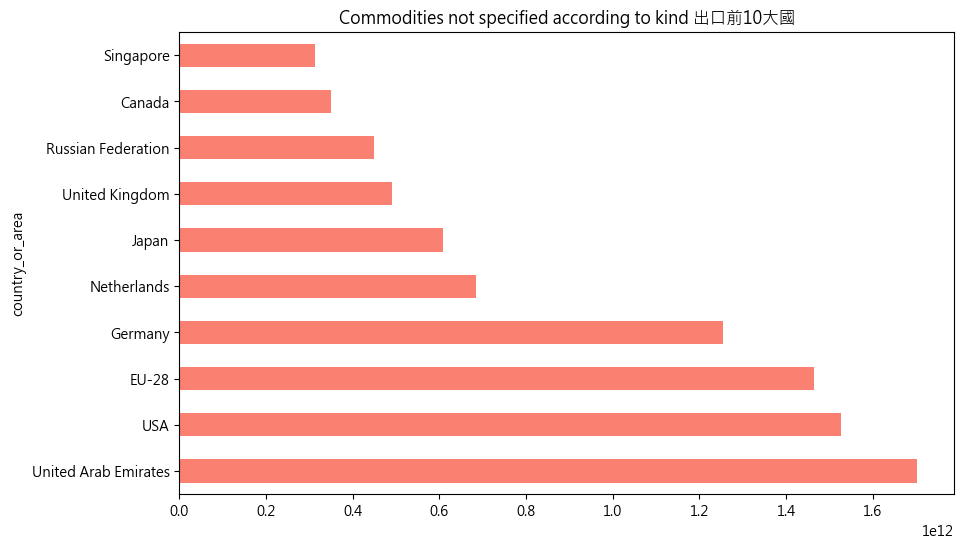

In [27]:
popular_item = top_commodities.index[0]
top_exporters = (
    df_export[df_export['commodity'] == popular_item]
    .groupby('country_or_area')['trade_usd']
    .sum()
    .sort_values(ascending = False)
    .head(10)
)

top_exporters.plot(kind='barh', figsize=(10, 6), title=f'{popular_item} 出口前10大國', color='salmon')

<Axes: title={'center': 'Commodities not specified according to kind 出口總額變化趨勢'}, xlabel='year'>

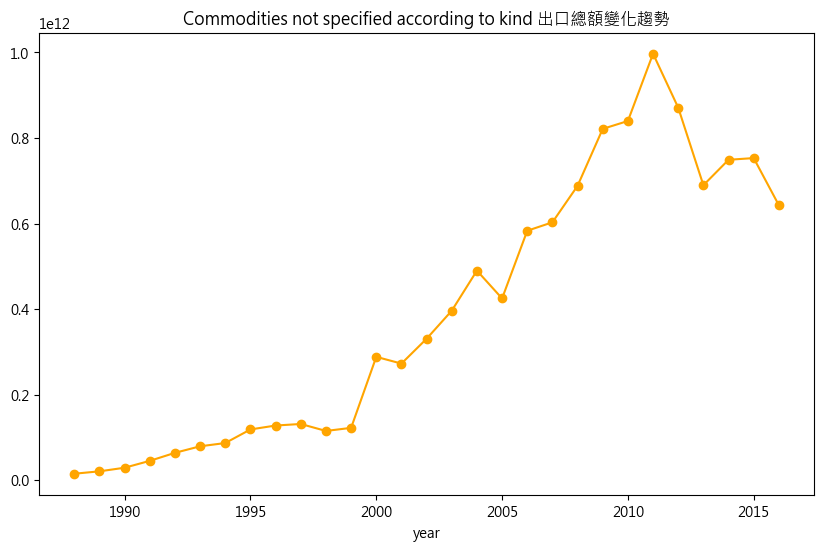

In [28]:
df_export['year'] = pd.to_datetime(df_export['year'], format='%Y')

trend = (
    df_export[df_export['commodity'] == popular_item]
    .groupby(df_export['year'].dt.year)['trade_usd']
    .sum()
)

trend.plot(kind='line', marker='o', figsize=(10, 6), title=f'{popular_item} 出口總額變化趨勢', color='orange')